# 1. Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

#read in stock data
adobe = pd.read_excel("Adobe.xlsx")
amazon = pd.read_excel("Amazon.xlsx")
apple = pd.read_excel("Apple.xlsx")
google = pd.read_excel("Google.xlsx")
intel = pd.read_excel("Intel.xlsx")
meta = pd.read_excel("Meta.xlsx")
microsoft = pd.read_excel("Microsoft.xlsx")
netflix = pd.read_excel("Netflix.xlsx")
nvidia = pd.read_excel("NVIDIA.xlsx")
oracle = pd.read_excel("Oracle.xlsx")

#read in financial indicators
IBES = pd.read_excel("IBES_final.xlsx")

#read in sentiment values
Roberta = pd.read_excel("Roberta.xlsx")
dictionary = pd.read_excel("dictionary.xlsx")
Textblob = pd.read_excel("Textblob.xlsx")

def f(r):
    if r<= 0:
        return 0
    if r> 0:
        return 1

def time_10(dataset,x):
    list1 = [] # save the start date of releasing FS
    price = []
    for i in x:
        select = list(np.where(dataset["Exchange Date"] == i)[0])
        list1.append(select[0])
        
    for i in range(len(list1)):
        price.extend([i for i in range(list1[i],list1[i]+11)])# save the upcoming 10 days after releasing FS
    print(price)
    
    list2 = []
    for i in range(1,10):
        for j in range(i*10,i*10+11):
            A=(dataset["Close"][j]-dataset["Close"][j-1])/dataset["Close"][j-1]
            list2.append(A)
    # print(list2)

    list3 = []
    r1 = sum(list2[1:11])/10
    r2 = sum(list2[11:21])/10
    r3 = sum(list2[21:31])/10
    r4 = sum(list2[31:41])/10
    r5 = sum(list2[41:51])/10
    r6 = sum(list2[51:61])/10
    r7 = sum(list2[61:71])/10
    r8 = sum(list2[71:81])/10
    r9 = sum(list2[81:91])/10
    r10 = sum(list2[91:101])/10 #calculate 10-day average return
    list3.append(r1)
    list3.append(r2)
    list3.append(r3)
    list3.append(r4)
    list3.append(r5)
    list3.append(r6)
    list3.append(r7)
    list3.append(r8)
    list3.append(r9)
    list3.append(r10)
    list4 = [v for v in list3 for i in range(260)] #assuming 260 trading days in a year
    dataset["Return"] = list4[0:len(dataset)]
    dataset["Return"] = dataset["Return"].apply(f) #convert return in to binary variable
    
    for t in range(1,7):
        dataset["ac_"+str(t)] = dataset["Return"].shift(t)
        
    return dataset.iloc[price]

In [2]:
AD = time_10(adobe,["2012-01-26","2013-01-22","2014-01-21","2015-01-20","2016-01-19",
                    "2017-01-20","2018-01-22","2019-01-25","2020-01-21","2021-01-15"]) #input the releasing dates of annual report each year

list_roberta=Roberta.iloc[0].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[0].dropna().iloc[1:11]
list_textblob=Textblob.iloc[0].dropna().iloc[1:11]

AD["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[0:10] for i in range(11)]
AD["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[0:10] for i in range(11)]
AD["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[0:10] for i in range(11)]
AD["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[0:10] for i in range(11)]
AD["SENrob"]=[val for val in list_roberta for i in range(11)]
AD["SENdic"]=[val for val in list_dictionary for i in range(11)]
AD["SENtb"]=[val for val in list_textblob for i in range(11)]

train=AD[0:88] #2012-2019 as train set
test=AD[88:109] #2020-2021 as test set
print(train)
print(test)

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284]
     Exchange Date        Close   Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080  4287745       1   1.0   1.0   1.0   1.0   
17      2012-01-27   240.771015  4290987       1   1.0   1.0   1.0   1.0   
18      2012-01-30   240.423600  5185002       1   1.0   1.0   1.0   1.0   
19      2012-01-31   240.014155  3753578       1   1.0   1.0   1.0   1.0   
20      2012-0

In [3]:
AM = time_10(amazon,["2012-02-01","2013-01-30","2014-01-31","2015-01-30","2016-01-29",
                    "2017-02-10","2018-02-02","2019-02-01","2020-01-31","2021-02-03"])

list_roberta=Roberta.iloc[2].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[2].dropna().iloc[1:11]
list_textblob=Textblob.iloc[2].dropna().iloc[1:11]

AM["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[20:30] for i in range(11)]
AM["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[20:30] for i in range(11)]
AM["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[20:30] for i in range(11)]
AM["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:30] for i in range(11)]
AM["SENrob"]=[val for val in list_roberta for i in range(11)]
AM["SENdic"]=[val for val in list_dictionary for i in range(11)]
AM["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,AM[0:88]],axis=0)
test=pd.concat([test,AM[88:109]],axis=0)
print(train)
print(test)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296]
     Exchange Date         Close   Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26    241.832080  4287745       1   1.0   1.0   1.0   1.0   
17      2012-01-27    240.771015  4290987       1   1.0   1.0   1.0   1.0   
18      2012-01-30    240.423600  5185002       1   1.0   1.0   1.0   1.0   
19      2012-01-31    240.014155  3753578       1   1.0   1.0   1.0   1.0   
20      2

In [4]:
AP = time_10(apple,["2012-10-31","2013-10-30","2014-10-27","2015-10-28","2016-10-26",
                    "2017-11-03","2018-11-05","2019-10-31","2020-10-30","2021-10-29"])

list_roberta=Roberta.iloc[1].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[1].dropna().iloc[1:11]
list_textblob=Textblob.iloc[1].dropna().iloc[1:11]

AP["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[10:20] for i in range(11)]
AP["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[10:20] for i in range(11)]
AP["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[10:20] for i in range(11)]
AP["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:30] for i in range(11)]
AP["SENrob"]=[val for val in list_roberta for i in range(11)]
AP["SENdic"]=[val for val in list_dictionary for i in range(11)]
AP["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,AP[0:88]],axis=0)
test=pd.concat([test,AP[88:109]],axis=0)
print(train)
print(test)

[208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483]
     Exchange Date       Close       Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080    4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27  240.771015    4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30  240.423600    5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31  240.014155    3753578.0       1   1.0   1.0   1

In [5]:
GO = time_10(google,["2016-03-29","2017-02-03","2018-02-06","2019-02-06","2020-02-04","2021-02-03"])

list_roberta=Roberta.iloc[3].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[3].dropna().iloc[1:11]
list_textblob=Textblob.iloc[3].dropna().iloc[1:11]

GO["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[30:36] for i in range(11)]
GO["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[30:36] for i in range(11)]
GO["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[30:36] for i in range(11)]
GO["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[30:36] for i in range(11)]
GO["SENrob"]=[val for val in list_roberta for i in range(11)]
GO["SENdic"]=[val for val in list_dictionary for i in range(11)]
GO["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,GO[0:44]],axis=0)
test=pd.concat([test,GO[44:65]],axis=0)
print(train)
print(test)

[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290]
    Exchange Date        Close     Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16     2012-01-26   241.832080  4287745.0       1   1.0   1.0   1.0   1.0   
17     2012-01-27   240.771015  4290987.0       1   1.0   1.0   1.0   1.0   
18     2012-01-30   240.423600  5185002.0       1   1.0   1.0   1.0   1.0   
19     2012-01-31   240.014155  3753578.0       1   1.0   1.0   1.0   1.0   
20     2012-02-01   242.306812  4654319.0       1   1.0   1.0   1.0   1.0   
..            ...          ...        ...     ...   ...   ...   ...   ...   
784    2019-02-14  8860.945320  1055297.0       1   1.0   1.0   1.0   1.0   
785    2019-02-15  8786.520351  1391348.0 

In [6]:
IN = time_10(intel,["2012-02-23","2013-02-19","2014-02-14","2015-02-13","2016-02-12",
                    "2017-02-17","2018-02-16","2019-02-01","2020-01-24","2021-01-22"])

list_roberta=Roberta.iloc[4].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[4].dropna().iloc[1:11]
list_textblob=Textblob.iloc[4].dropna().iloc[1:11]


IN["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[36:46] for i in range(11)]
IN["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[36:46] for i in range(11)]
IN["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[36:46] for i in range(11)]
IN["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[36:46] for i in range(11)]
IN["SENrob"]=[val for val in list_roberta for i in range(11)]
IN["SENdic"]=[val for val in list_dictionary for i in range(11)]
IN["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,IN[0:88]],axis=0)
test=pd.concat([test,IN[88:109]],axis=0)
print(train)
print(test)

[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288]
     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27  240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30  240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31  240.014155   3753578.0       1   1.0   1.0   1.0   1.0   
20  

In [7]:
ME = time_10(meta,["2013-02-01","2014-01-31","2015-02-13","2016-04-27",
                    "2017-02-03","2018-02-01","2019-01-31","2020-01-30","2021-01-28"])

list_roberta=Roberta.iloc[5].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[5].dropna().iloc[1:11]
list_textblob=Textblob.iloc[5].dropna().iloc[1:11]

ME["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[46:55] for i in range(11)]
ME["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[46:55] for i in range(11)]
ME["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[46:55] for i in range(11)]
ME["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[46:55] for i in range(11)]
ME["SENrob"]=[val for val in list_roberta for i in range(11)]
ME["SENdic"]=[val for val in list_dictionary for i in range(11)]
ME["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,ME[0:77]],axis=0)
test=pd.concat([test,ME[77:98]],axis=0)
print(train)
print(test)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042]
     Exchange Date        Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27   240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30   240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31   240.014155   3753578.0       1   1.0   1.0   1.0   1.0   
20      2012-02-01   242.306812   4654319.0       1   1.0   1.0  

In [8]:
MI = time_10(microsoft,["2012-07-26","2013-07-30","2014-07-31","2015-07-31","2016-07-28",
                    "2017-08-02","2018-08-03","2019-08-01","2020-07-30","2021-07-29"])

list_roberta=Roberta.iloc[6].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[6].dropna().iloc[1:11]
list_textblob=Textblob.iloc[6].dropna().iloc[1:11]

MI["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[55:65] for i in range(11)]
MI["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[55:65] for i in range(11)]
MI["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[55:65] for i in range(11)]
MI["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[55:65] for i in range(11)]
MI["SENrob"]=[val for val in list_roberta for i in range(11)]
MI["SENdic"]=[val for val in list_dictionary for i in range(11)]
MI["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,MI[0:88]],axis=0)
test=pd.concat([test,MI[88:109]],axis=0)
print(train)
print(test)

[142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418]
     Exchange Date        Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27   240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30   240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31   240.014155   3753578.0       1   1.0   1.0   1

In [9]:
NE = time_10(netflix,["2012-02-10","2013-02-01","2014-02-03","2015-01-29","2016-01-28",
                    "2017-01-27","2018-01-29","2019-01-29","2020-01-29","2021-01-28"])

list_roberta=Roberta.iloc[7].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[7].dropna().iloc[1:11]
list_textblob=Textblob.iloc[7].dropna().iloc[1:11]

NE["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[65:75] for i in range(11)]
NE["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[65:75] for i in range(11)]
NE["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[65:75] for i in range(11)]
NE["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[65:75] for i in range(11)]
NE["SENrob"]=[val for val in list_roberta for i in range(11)]
NE["SENdic"]=[val for val in list_dictionary for i in range(11)]
NE["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,NE[0:88]],axis=0)
test=pd.concat([test,NE[88:109]],axis=0)
print(train)
print(test)

[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292]
     Exchange Date        Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27   240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30   240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31   240.014155   3753578.0       1   1.0   1.0   1.0   1.0   

In [10]:
NV = time_10(nvidia,["2012-03-13","2013-03-12","2014-03-13","2015-03-12","2016-03-17",
                    "2017-03-01","2018-02-28","2019-02-21","2020-02-20","2021-02-26"])

list_roberta=Roberta.iloc[8].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[8].dropna().iloc[1:11]
list_textblob=Textblob.iloc[8].dropna().iloc[1:11]


NV["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[75:85] for i in range(11)]
NV["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[75:85] for i in range(11)]
NV["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[75:85] for i in range(11)]
NV["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[75:85] for i in range(11)]
NV["SENrob"]=[val for val in list_roberta for i in range(11)]
NV["SENdic"]=[val for val in list_dictionary for i in range(11)]
NV["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,NV[0:88]],axis=0)
test=pd.concat([test,NV[88:109]],axis=0)
print(train)
print(test)

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312]
     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27  240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30  240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31  240.014155   3753578.0       1   1.0   1.0   1.0   1.0   
20  

In [11]:
OR = time_10(oracle,["2012-06-26","2013-06-26","2014-06-26","2015-06-25","2016-06-22",
                    "2017-06-27","2018-06-22","2019-06-21","2020-06-22","2021-06-02"])

list_roberta=Roberta.iloc[9].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[9].dropna().iloc[1:11]
list_textblob=Textblob.iloc[9].dropna().iloc[1:11]


OR["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[85:95] for i in range(11)]
OR["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[85:95] for i in range(11)]
OR["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[85:95] for i in range(11)]
OR["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[85:95] for i in range(11)]
OR["SENrob"]=[val for val in list_roberta for i in range(11)]
OR["SENdic"]=[val for val in list_dictionary for i in range(11)]
OR["SENtb"]=[val for val in list_textblob for i in range(11)]

train=pd.concat([train,OR[0:88]],axis=0)
test=pd.concat([test,OR[88:109]],axis=0)
print(train)
print(test)

[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378]
     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       1   1.0   1.0   1.0   1.0   
17      2012-01-27  240.771015   4290987.0       1   1.0   1.0   1.0   1.0   
18      2012-01-30  240.423600   5185002.0       1   1.0   1.0   1.0   1.0   
19      2012-01-31  240.014155   3753578.0       1   1.0   1.0   1.0   

# 2. Methods
## 2.1 Lasso & Ridge Regression

In [12]:
#x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
#x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
y_train=train[["Return"]]
y_test=test[["Return"]]

In [13]:
# Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
ridge=Ridge(random_state=4130)

fitted_ridge=GridSearchCV(ridge,param_grid,cv=10,scoring = "r2")
fitted_ridge.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy
R_sq1=r2_score(y_train,fitted_ridge.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_ridge.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Ridge(alpha=0.001).fit(x_train,y_train).coef_

The best tuned parameter of fitted_ridge is: {'alpha': 0.001} ,and the in-sample R-square is: 0.9845737763757356
The best tuned parameter of fitted_ridge is: {'alpha': 0.001} ,and the out-of-sample R-square is: 0.8490352099191784


array([[ 6.75350191e-04, -2.52659791e-02,  1.14523103e-02,
         7.40295644e-03, -1.39389106e-01,  2.81278679e-01,
        -5.12298931e-02,  9.78546028e-01,  4.94024467e-04,
         1.04909551e-02,  8.62629633e-03,  1.86620579e-03,
        -6.90128722e-03]])

In [14]:
# Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
lasso=Lasso(random_state=1000)

fitted_lasso=GridSearchCV(lasso,param_grid,cv=10,scoring = "r2")
fitted_lasso.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy
R_sq1=r2_score(y_train,fitted_lasso.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_lasso.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Lasso(alpha=0.00001).fit(x_train,y_train).coef_

The best tuned parameter of fitted_lasso is: {'alpha': 1e-05} ,and the in-sample R-square is: 0.9845618375456772
The best tuned parameter of fitted_lasso is: {'alpha': 1e-05} ,and the out-of-sample R-square is: 0.8393325017451554


array([ 5.80411938e-04, -2.39173342e-02,  9.01302364e-03,  7.63779951e-03,
       -6.17041110e-02,  1.21071313e-01, -0.00000000e+00,  9.78985539e-01,
        4.99153226e-03,  7.46884765e-03,  4.81533612e-03,  0.00000000e+00,
       -2.87756236e-03])

## 2.2 Classification

In [15]:
#2.2.1.Logistic regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=3,max_iter=6000)
model_lr.fit(x_train,y_train)
y_predict_lr=model_lr.predict(x_test)
model_lr.coef_

array([[-1.22666866, -0.34202738, -0.24866942,  0.92402077, -0.05806945,
         0.04504956,  0.00894012,  4.34692344,  2.17161818,  1.66462634,
         1.02564   ,  0.7871313 ,  0.69365637]])

In [16]:
#2.2.2.Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_predict_nb=model_nb.predict(x_test)

In [17]:
#2.2.3.Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)
y_predict_lda=model_lda.predict(x_test)
model_lda.coef_

array([[ 1.89185154e-01, -7.06629255e+00,  3.21039074e+00,
         2.06245111e+00, -3.93546517e+01,  8.00862225e+01,
        -1.47241783e+01,  2.73594537e+02, -2.64428674e-13,
         2.93148782e+00,  2.41123816e+00,  5.20249664e-01,
        -1.92470073e+00]])

In [18]:
#2.2.4.Support Vector Machine (SVC)
from sklearn.svm import SVC
model_svc=SVC(gamma = "auto")
model_svc.fit(x_train,y_train)
y_predict_svc=model_svc.predict(x_test)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00108
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00074
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.99818
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000


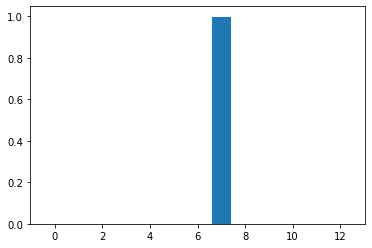

In [19]:
#2.2.5.Decision Tree
from sklearn import tree
model_dt=tree.DecisionTreeClassifier(random_state = 4130)
model_dt.fit(x_train,y_train)
y_predict_dt=model_dt.predict(x_test)
y_predict_dt

# decision tree for feature importance on a classification problem
from matplotlib import pyplot
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [20]:
#2.2.6.Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=50)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
print("1.Logistic Regression:",classification_report(y_test,y_predict_lr))
print("2.Naive Bayes:",classification_report(y_test,y_predict_nb))
print("3.Linear Discriminant Analysis",classification_report(y_test,y_predict_lda))
print("4.Support Vector Machine",classification_report(y_test,y_predict_svc))
print("5.Decision Tree",classification_report(y_test,y_predict_dt))
print("6.Nearest Neighbor",classification_report(y_test,y_predict_knn))

1.Logistic Regression:               precision    recall  f1-score   support

           0       1.00      0.91      0.95       116
           1       0.90      1.00      0.95        94

    accuracy                           0.95       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.95      0.95       210

2.Naive Bayes:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        94

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

3.Linear Discriminant Analysis               precision    recall  f1-score   support

           0       1.00      0.91      0.95       116
           1       0.90      1.00      0.95        94

    accuracy                           0.95       210
   macro avg       0.95      0.96      0.95       210
weigh

## 2.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
clf=RandomForestClassifier(n_estimators=2000,max_features=3,random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [23]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

Accuracy:  1.0
7     0.283536
8     0.215142
9     0.167527
10    0.136287
11    0.096560
12    0.083338
5     0.004113
3     0.003426
0     0.002646
1     0.002597
4     0.002195
2     0.001918
6     0.000714
dtype: float64
